In [1]:
%matplotlib inline
import statistics as std
import pandas as pd                                 
import numpy as np                          #Importando os módulos necessários
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.time import Time
from astropy.io.fits import HDUList

In [2]:
it = ['2019-01-31T21:00:00']                             #Inicio das observaçoes
itime = Time(it, format = 'isot', scale = 'utc' )

In [3]:
file = open('logfile','r')                       #Abrindo o arquivo com os dados
fwhm_A10BMLZ = []
fwhm_1998OH = []                                 #Listas vazias para salvar os valores do fwhm
fwhm_GD108 = []
fwhm_2003YE45 = []                          


#A10BMLZ
for indice, linha in enumerate(file):            #Loop para ler as linhas apartir da 1
    if indice < 53 :
        if linha[:47] == '  Average full width at half maximum (FWHM) of ': 
            fwhm_A10BMLZ.append(float(linha[47:]))
        elif linha[:39] == '  Full width at half maximum (FWHM) of ': 
            fwhm_A10BMLZ.append(float(linha[39:]))
#1998OH  
    elif indice > 54 and indice < 83:
        if linha[:47] == '  Average full width at half maximum (FWHM) of ': 
            fwhm_1998OH.append(float(linha[47:]))
        elif linha[:39] == '  Full width at half maximum (FWHM) of ': 
            fwhm_1998OH.append(float(linha[39:]))
#GD108
    if indice > 84 and indice < 128 :
        if linha[:47] == '  Average full width at half maximum (FWHM) of ': 
            fwhm_GD108.append(float(linha[47:]))
        elif linha[:39] == '  Full width at half maximum (FWHM) of ': 
            fwhm_GD108.append(float(linha[39:]))
#2003YE45
    elif indice > 129:
        if linha[:47] == '  Average full width at half maximum (FWHM) of ': 
            fwhm_2003YE45.append(float(linha[47:]))
        elif linha[:39] == '  Full width at half maximum (FWHM) of ': 
            fwhm_2003YE45.append(float(linha[39:]))


fwhm_A10BMLZ = sorted(fwhm_A10BMLZ)            
fwhm_1998OH = sorted(fwhm_1998OH)
fwhm_GD108 = sorted(fwhm_GD108)
fwhm_2003YE45 = sorted(fwhm_2003YE45)



<h1>A10BMLZ</h1>

In [4]:
#imagens usadas no psfmeasure = 20/40/60

name_A10BMLZ = 'A10BMLZ/A10BMLZ_10s_b2x2-020_SF.fit'
imagens_A10BMLZ = []                                                        #Lista com o nome das imagens

for i in range(0,60,20):
    number_A10BMLZ = name_A10BMLZ[25:28].replace(name_A10BMLZ[26:28],str(int(name_A10BMLZ[26:28])+i))
    imagens_A10BMLZ.append('A10BMLZ/A10BMLZ_10s_b2x2-' + str(number_A10BMLZ) + '_SF.fit' )

In [5]:
datas_A10BMLZ = []                                                #Lista com as datas

for i in imagens_A10BMLZ:                                         #Iterando dentro da lista com os nomes
    with fits.open(i) as hdul:                                #Abrindo cada elemento da lista imagens
        for hdu in hdul:                                      #Extraindo o header de cada imagem
            datas_A10BMLZ.append(hdul[0].header['DATE-OBS'])
            
tempos_A10BMLZ = Time(datas_A10BMLZ, format = 'isot', scale = 'utc')      #Instanciando a classe Time com os dados

dt_A10BMLZ = []                                                                 #Inicializando a lista com os pontos
t_A10BMLZ = np.empty(len(tempos_A10BMLZ))                                 #Inicializando array para plotar

for i in range(len(tempos_A10BMLZ)):
    dt_A10BMLZ.append(tempos_A10BMLZ[i] - itime)
    t_A10BMLZ[i] = (dt_A10BMLZ[i].value)*24                               #Calculando os valores de dt em HORAS

<IPython.core.display.Javascript object>


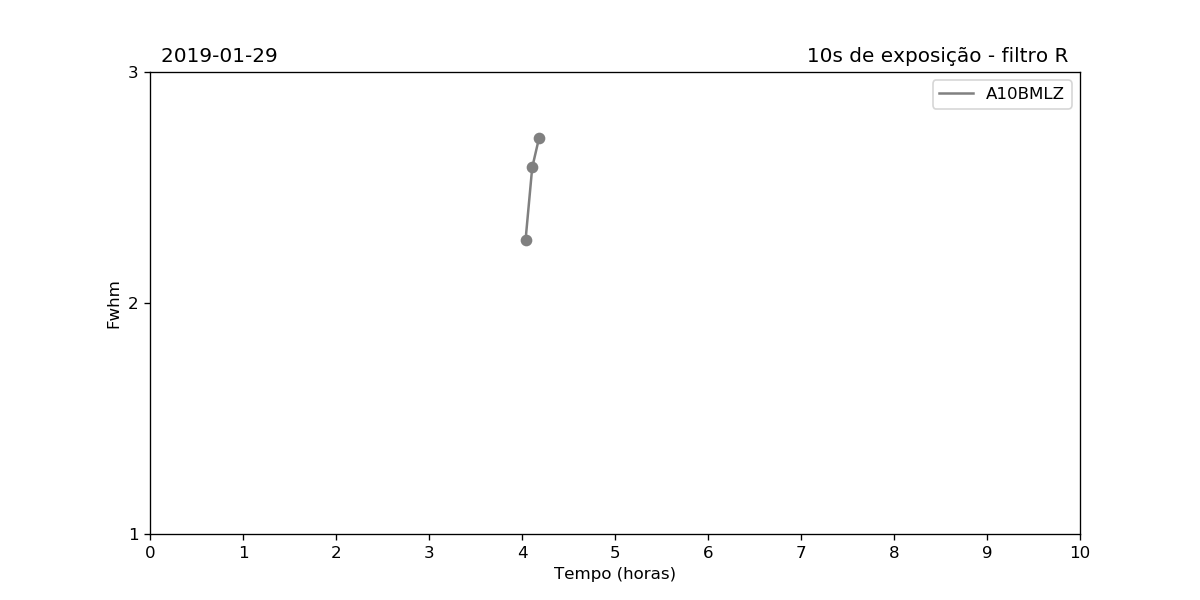

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(t_A10BMLZ, fwhm_A10BMLZ, color = 'grey')
plt.plot(t_A10BMLZ, fwhm_A10BMLZ, color = 'grey', label  ='A10BMLZ')
plt.yticks(np.arange(1, 4, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-29' + ' '*83 + '10s de exposição - filtro R')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.legend()
plt.show()

<h1>1998OH</h1>

In [7]:
#imagens usadas no psfmeasure = 2/3/4
name_1998OH = '1998OH/1998OH_120s_b2x2-002_R.fit'
imagens_1998OH = []                                                        #Lista com o nome das imagens

for i in range(0,3,1):       
    number_1998OH = name_1998OH[24:27].replace(name_1998OH[26:27],str(int(name_1998OH[26:27])+i))
    imagens_1998OH.append('1998OH/1998OH_120s_b2x2-' + str(number_1998OH) + '_R.fit' )

In [8]:
datas_1998OH = []                                                #Lista com as datas

for i in imagens_1998OH:                                        #Iterando dentro da lista com os nomes
    with fits.open(i) as hdul:                           #Abrindo cada elemento da lista imagens
        for hdu in hdul:                                 #Extraindo o header de cada imagem
            datas_1998OH.append(hdul[0].header['DATE-OBS'])
            
tempos_1998OH = Time(datas_1998OH, format = 'isot', scale = 'utc')      #Instanciando a classe Time com os dados

dt_1998OH = []                                                   #Inicializando a lista com os pontos
t_1998OH = np.empty(len(tempos_1998OH))                                 #Inicializando array para plotar

for i in range(len(tempos_1998OH)):
    dt_1998OH.append(tempos_1998OH[i] - itime)
    t_1998OH[i] = (dt_1998OH[i].value)*24                               #Calculando os valores de dt em HORAS
    
t_1998OH = sorted(t_1998OH)

<IPython.core.display.Javascript object>


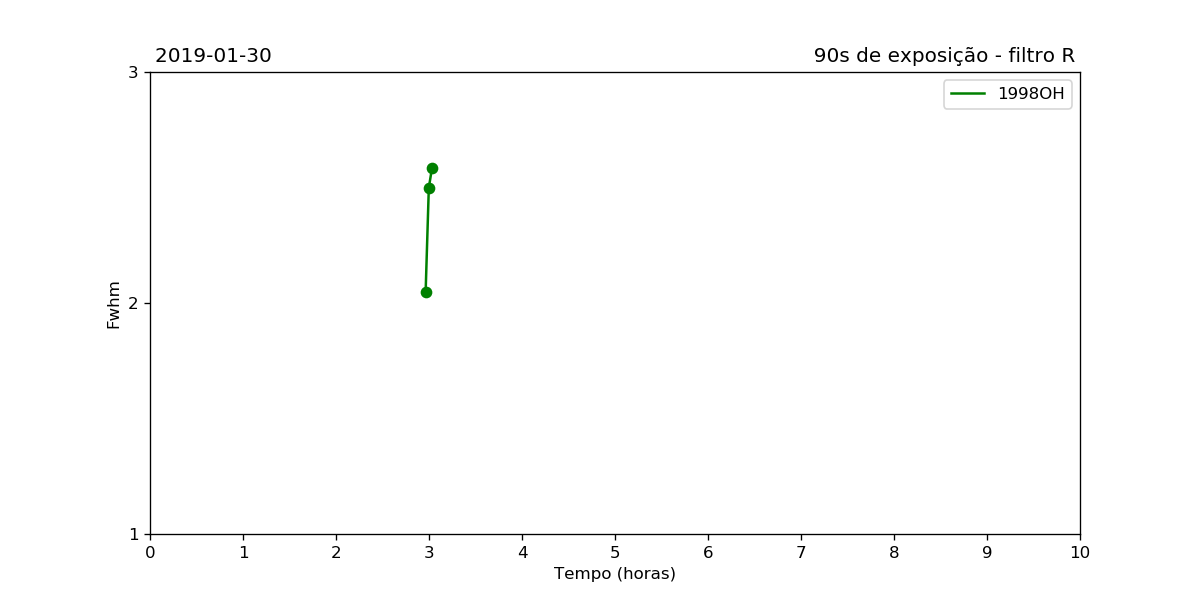

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(t_1998OH, fwhm_1998OH, color = 'green')
plt.plot(t_1998OH, fwhm_1998OH, color = 'green', label='1998OH')
plt.yticks(np.arange(1, 4, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-30' + ' '*85 + '90s de exposição - filtro R')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.legend()
plt.show()

<h1>GD108</h1>

In [10]:
#imagens usadas no psfmeasure = 8,16,24

name_GD108 = 'GD108/GD108_15s_b2x2-016_R.fit'
imagens_GD108 = []                                                        #Lista com o nome das imagens

for i in range(0,10,8):                                                     #Para imagens 001 ate 009 
    number_GD108 = name_GD108[21:24].replace(name_GD108[22:24],str(int(name_GD108[22:24])+i))   
    imagens_GD108.append('GD108/GD108_15s_b2x2-' + str(number_GD108) + '_R.fit' )

imagens_GD108.insert(0,'GD108/GD108_15s_b2x2-008_R.fit')

In [11]:
datas_GD108 = []                                                #Lista com as datas

for i in imagens_GD108:                                                       #Iterando dentro da lista com os nomes
    with fits.open(i) as hdul:                                                        #Abrindo cada elemento da lista imagens
        for hdu in hdul:                                                              #Extraindo o header de cada imagem
            datas_GD108.append(hdul[0].header['DATE-OBS'])
            
tempos_GD108 = Time(datas_GD108, format = 'isot', scale = 'utc')      #Instanciando a classe Time com os dados

dt_GD108 = []                                                                 #Inicializando a lista com os pontos
t_GD108 = np.empty(len(tempos_GD108))                                 #Inicializando array para plotar

for i in range(len(tempos_GD108)):
    dt_GD108.append(tempos_GD108[i] - itime)
    t_GD108[i] = (dt_GD108[i].value)*24                               #Calculando os valores de dt em HORAS

<IPython.core.display.Javascript object>


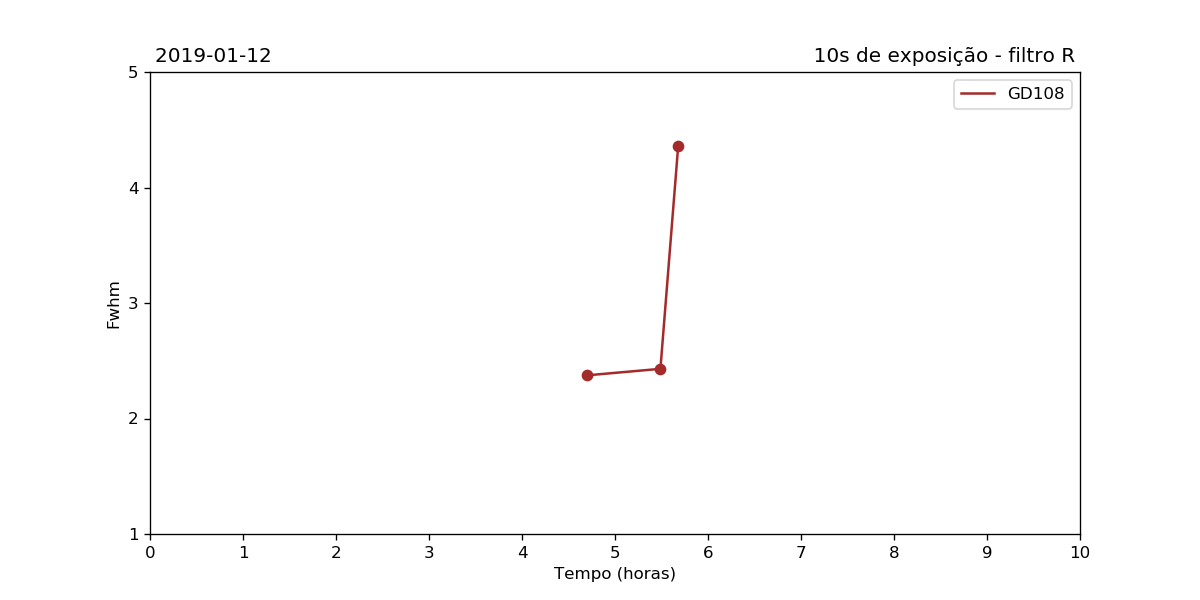

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(t_GD108, fwhm_GD108, color = 'brown')
plt.plot(t_GD108, fwhm_GD108, color = 'brown', label  ='GD108')
plt.yticks(np.arange(1, 6, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-12' + ' '*85 + '10s de exposição - filtro R')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.legend()
plt.show()

<h1>2003YE45</h1>

In [13]:
#imagens usadas no psfmeasure = 60/120/180

name_2003YE45 = '2003YE45/2003YE45_50s_b2x2-120_R.fit'
imagens_2003YE45 = []                                                         #Lista com o nome das imagens

for i in range(0,120,60):       
    number_2003YE45 = name_2003YE45[27:30].replace(name_2003YE45[28:30],str(int(name_2003YE45[28:30])+i))   
    imagens_2003YE45.append('2003YE45/2003YE45_50s_b2x2-' + str(number_2003YE45) + '_R.fit' )
        
imagens_2003YE45.insert(0,'2003YE45/2003YE45_50s_b2x2-060_R.fit')

In [14]:
datas_2003YE45 = []                                                #Lista com as datas

for i in imagens_2003YE45:                                                       #Iterando dentro da lista com os nomes
    with fits.open(i) as hdul:                                                        #Abrindo cada elemento da lista imagens
        for hdu in hdul:                                                              #Extraindo o header de cada imagem
            datas_2003YE45.append(hdul[0].header['DATE-OBS'])
            
tempos_2003YE45 = Time(datas_2003YE45, format = 'isot', scale = 'utc')      #Instanciando a classe Time com os dados

dt_2003YE45 = []                                                                 #Inicializando a lista com os pontos
t_2003YE45 = np.empty(len(tempos_2003YE45))                                 #Inicializando array para plotar

for i in range(len(tempos_2003YE45)):
    dt_2003YE45.append(tempos_2003YE45[i] - itime)
    t_2003YE45[i] = (dt_2003YE45[i].value)*24                               #Calculando os valores de dt em HORAS

<IPython.core.display.Javascript object>


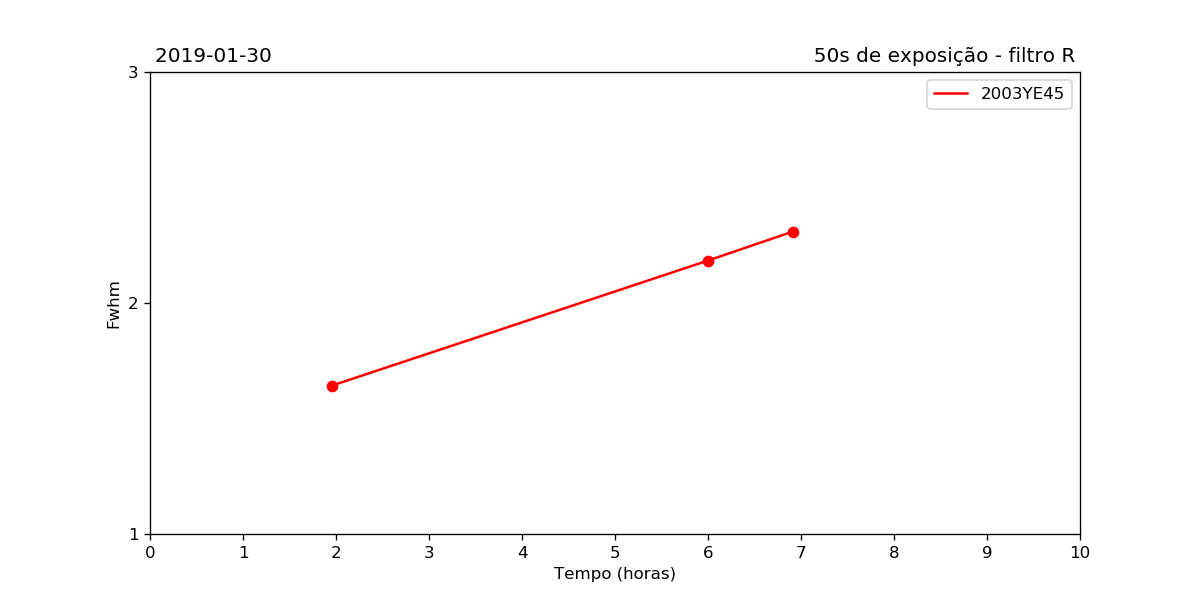

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(t_2003YE45, fwhm_2003YE45, color = 'red')
plt.plot(t_2003YE45, fwhm_2003YE45, color = 'red', label  ='2003YE45')
plt.yticks(np.arange(1, 4, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-30' + ' '*85 + '50s de exposição - filtro R')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


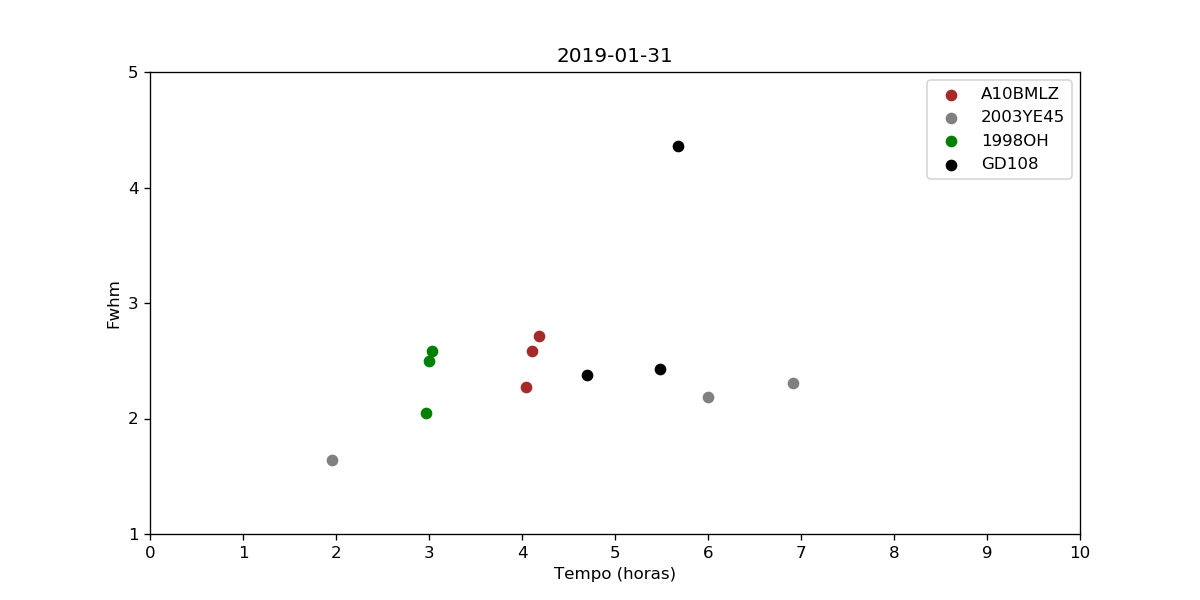

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(t_A10BMLZ, fwhm_A10BMLZ, color = 'brown', label = 'A10BMLZ')
plt.scatter(t_2003YE45, fwhm_2003YE45, color = 'grey', label = '2003YE45')
plt.scatter(t_1998OH, fwhm_1998OH, color = 'green', label = '1998OH')
plt.scatter(t_GD108, fwhm_GD108, color = 'black', label = 'GD108')

plt.yticks(np.arange(1, 6, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-31')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.savefig('2019-01-31_scatterfwhmxtime.png')
plt.legend()
plt.show()


<IPython.core.display.Javascript object>


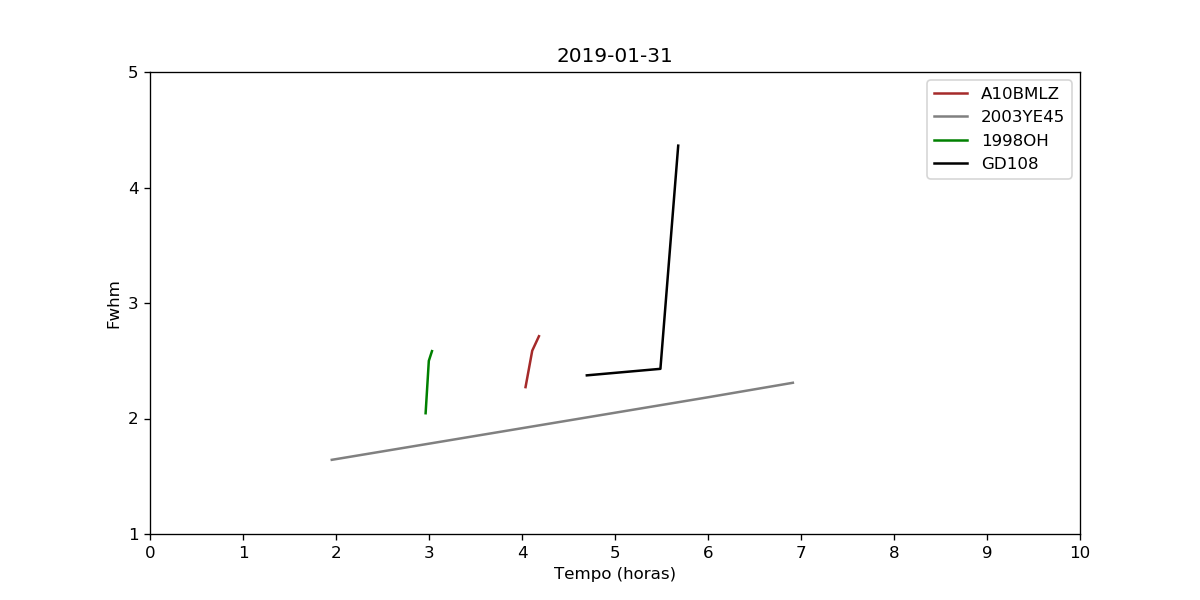

In [21]:
plt.figure(figsize=(10,5))
plt.plot(t_A10BMLZ, fwhm_A10BMLZ, color = 'brown', label = 'A10BMLZ')
plt.plot(t_2003YE45, fwhm_2003YE45, color = 'grey', label = '2003YE45')
plt.plot(t_1998OH, fwhm_1998OH, color = 'green', label = '1998OH')
plt.plot(t_GD108, fwhm_GD108, color = 'black', label = 'GD108')

plt.yticks(np.arange(1, 6, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-31')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.savefig('2019-01-31_plotfwhmxtime.png')
plt.legend()
plt.show()


In [18]:
fwhm = fwhm_1998OH + fwhm_2003YE45 + fwhm_GD108 + fwhm_A10BMLZ
mean_fwhm = std.mean(fwhm)
median_fwhm = std.median(fwhm)

print(mean_fwhm)
print(median_fwhm)

2.4999833333333332
2.4018
